# 2D convolution

In this notebook a convolution applied to an image is demonstrted.<br> With the [opencv](https://docs.opencv.org) library, image processing can be done in python.

A filter operation is a convolution of the image represented as matrix of numbers and a filter. In this notebook the gaussian filtering and the sobel filter is presented.
More on 2D filtering with openCV can be found [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#d-convolution-image-filtering).

A detailed description to the Sobel filter with opencv can be found [here](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html).

In [2]:
# load opencv library
#
import cv2

In [3]:
# load numpy for matrix operations
#
import numpy as np

In [4]:
# pyplot for displaying images
#
from matplotlib import pyplot as plt

In [5]:
# load picture from pexels int current environment
#
# in jupyter lab:
#
# %%bash
# curl -O --location "https://images.pexels.com/photos/159298/gears-cogs-machine-machinery-159298.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500"
#
# 
!curl -O --location "https://images.pexels.com/photos/159298/gears-cogs-machine-machinery-159298.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30394  100 30394    0     0  50996      0 --:--:-- --:--:-- --:--:--     0--:--:-- --:--:-- 50996


In [6]:
# load original image
#
# hint: check the environemnt for the correct image name
#
image_1 = cv2.imread('gears-cogs-machine-machinery-159298.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500')
#
# resize image to 600 x 600 px
#
original_size = image_1.shape
#
# create ratio: new width / original width for a correct resizing
#
r = 600 / original_size[1]
dim = (600, int(original_size[0]*r))
#
img1_work = cv2.resize(image_1, dim)

### gaussian filter
Gaussian filter blurs an image and reduces noise.<br>
[GaussianBlur()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)<br>
[GaussianKernel](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa)

In [7]:
# Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
#
gs_kernel_size = (3,3)
sigma_X = 0
sigma_Y = 0 #(default), see GaussianKernel, https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa
#
blur_gs = cv2.GaussianBlur(img1_work, gs_kernel_size, sigma_X)
#

### sobel filter
The Sobel Operator is a discrete differentiation operator. It computes an approximation of the gradient of an image intensity function.
The Sobel Operator combines Gaussian smoothing and differentiation. For example: sobel filtering with a kernel size of $3$ and  an image ***I*** .

calculate two deviations:
$$G_x = \begin{bmatrix} -1 & 0 & +1  \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} *  I$$

$$G_y = \begin{bmatrix} -1 & -2 & -1  \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} * I$$

At each point of the image we calculate an approximation of the gradient in that point by combining both results above:
$$G = \sqrt{G_x^2 + G_y^2} $$

In [8]:
# sobel parameters
#
kernel_size = 3
dx = 1
dy = 1
#
sobelx = cv2.Sobel(img1_work, cv2.CV_64F, dx, dy, ksize=kernel_size)
sobely = cv2.Sobel(img1_work, cv2.CV_64F, dx, dy, ksize=kernel_size)
#

In [9]:
# calculate absolute values, and converts the result to 8-bit.
#
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
#

In [12]:
# approximate the gradient by adding the single gradients
#
#
grad = cv2.addWeighted(abs_grad_x, 0.85, abs_grad_y, 0.85, 0)

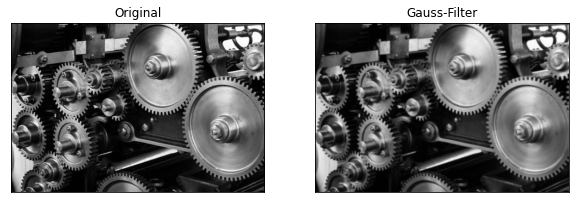

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


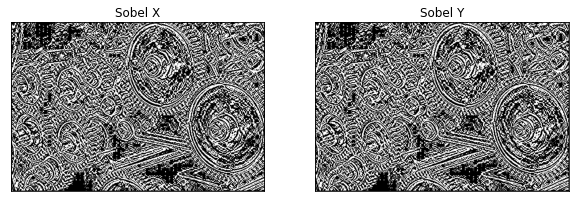

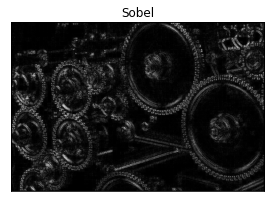

In [13]:
# display images
#
fig, axes = plt.subplots(1,2, figsize=(10,10))
#
plt.subplot(1,2,1),plt.imshow(image_1)
plt.title('Original'), plt.xticks([]), plt.yticks([])
#
plt.subplot(1,2,2),plt.imshow(blur_gs)
plt.title('Gauss-Filter'), plt.xticks([]), plt.yticks([])
#
plt.show()
#
#
plt.subplots(1,2, figsize=(10,10))
#
plt.subplot(1,2,1),plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
#
plt.subplot(1,2,2),plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
#
plt.show()
#
plt.subplots(figsize=(10,10))
#
plt.subplot(1,2,1),plt.imshow(grad)
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.show()